In [42]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def integral(Y1,Y2,E1,E2):
    INT=(Y2*E2-Y1*E1)/((np.log(Y2/Y1)/np.log(E2/E1)+1))
    #print(E1,E2,INT)
    return INT

def load_obj(name):
    with open('C:\\Users\\ginti\\Desktop\\nirs\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def Y_NM_Mi20_a(energy,h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    if energy<1.7:
        a,b,c,d=0.5082, -3.0659, 7.2827, -9.5396
    #if energy<1.6:
    #    a,b,c,d=2.0404,	-8.1776,	12.354,	-11.1
    elif (energy>=1.7 and energy<15):
        a,b,c,d=0.1179,	-1.2022,	4.9329,	-8.65
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A = 9.422E-09*np.power(X,5) - 2.284E-07*np.power(X,4) + 2.037E-06*np.power(X,3) - 7.828E-06*np.power(X,2) + 1.203E-05*np.power(X,1) - 5.545E-06					
    B = -5.351E-06*np.power(X,5) + 1.316E-04*np.power(X,4) - 1.226E-03*np.power(X,3) + 5.176E-03*np.power(X,2) - 1.017E-02*np.power(X,1) + 1.458E-02				
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

def Y_NM_Mi20_p(energy, h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    #if energy<1.25:
    #    a,b,c,d=6.09,	-14.06,	13.98,	-11.615
    if energy<1.28:
        a,b,c,d=0,	-8.6616,	13.879,	-12.104
    elif energy >=1.28 and energy<10:
        a,b,c,d=-0.186,	0.428,	2.831,	-8.76
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A= 6.945E-09*np.power(X,5) - 1.461E-07*np.power(X,4) + 1.115E-06*np.power(X,3) - 3.402E-06*np.power(X,2) + 3.355E-06*np.power(X,1) - 9.823E-07
    B= -3.963E-06*np.power(X,5) + 8.091E-05*np.power(X,4) - 6.394E-04*np.power(X,3) + 2.348E-03*np.power(X,2) - 4.713E-03*np.power(X,1) + 1.186E-02
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

In [43]:
    data_protons = load_obj('p_PAM_CR')
    data_he = load_obj('a_PAM_CR')

    newprot = []

    for k in data_protons:
        x = np.log10(data_protons[k][4])
        y = np.log10(data_protons[k][6])
        f = interpolate.interp1d(x, y, fill_value="extrapolate")

        xnew = np.log10(data_he[k][4])
        ynew=f(xnew)

        newprot.append(10**ynew)

In [44]:
def heppam(ener):
    
    data_protons = load_obj('p_PAM_CR')
    data_he = load_obj('a_PAM_CR')

    newprot = []

    for k in data_protons:
        x = np.log10(data_protons[k][4])
        y = np.log10(data_protons[k][6])
        f = interpolate.interp1d(x, y, fill_value="extrapolate")

        xnew = np.log10(data_he[k][4])
        ynew=f(xnew)

        newprot.append(10**ynew)
        
        
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavyp.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[0])
    iheavy.close()

    l = 0
    hep = []
    meh = []

    for i in data_he:
        a = (float(data_he[i].iloc[[ener], [6]].values)*(1 + float(heavy[ener])))/float(newprot[l][ener])
        hep.append(a)                
        l+=1
        
    return hep

In [45]:
def summ1(pc,depth):
    
    tt = depth
    
    data_protons = load_obj('p_PAM_CR')
    data_he = load_obj('a_PAM_CR')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(0,98):
            if float(data_protons[j].iloc[[k], [0]].values) > pc:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_p(a,tt) * float(data_protons[j].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_p(c,tt) * float(data_protons[j].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        al.append(s1)
        s1 = 0
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavyp.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[0])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,49):        
            if float(data_he[j].iloc[[k], [0]].values) > pc:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_a(a,tt) * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_a(c,tt) * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(len(an)):
        phe = al[i] + an[i]
        nn.append(phe)
        
    return nn

In [46]:
time = load_obj('time_PAM_CR')
t = []
for j in range(0, 51):
    a = float(time.iloc[[j], [0]].values)
    t.append(a)

In [47]:
n57 = summ1(6.90668,886.94)
nn57 = []
for i in n57:
    nn57.append(i/(sum(n57)/len(n57)))
n010 = summ1(0,1025.07)
nn010 = []
for i in n010:
    nn010.append(i/(sum(n010)/len(n010)))

Text(0, 0.5, '$NM_{1}/NM_{2}$')

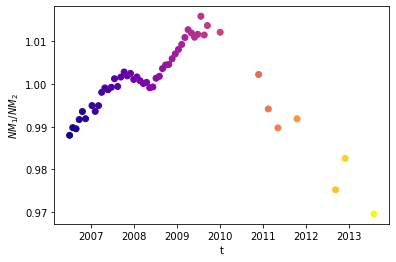

In [48]:
nnn=[]
for i in range(len(n57)):
    a=nn010[i]/nn57[i]
    nnn.append(a)
    
fig = plt.figure()
plt.scatter(t, nnn, c=t, cmap="plasma")
plt.xlabel('t')
plt.ylabel('$NM_{1}/NM_{2}$')

In [49]:
data_he = load_obj('a_PAM_CR')

In [50]:
hepp = []
for k in range(len(data_he[2045])):
    he = heppam(k)
    hepp.append(he)

In [51]:
corr = []
for k in hepp:
    x = np.array(k).reshape((-1, 1))
    y = np.array(nnn)
    model = LinearRegression().fit(x, y)

    x_train = x.reshape(-1, 1)
    x_test = x.reshape(-1, 1)
    y_pred = model.predict(x_test)
    coefficient_of_dermination2 = r2_score(y, y_pred)
    corr.append(coefficient_of_dermination2)

print(corr)

[0.70633178179456, 0.8280546959892201, 0.8554885438597175, 0.9065818775388207, 0.9142663615391472, 0.9165593790767053, 0.9145561504812395, 0.9138777654158814, 0.8963800936572662, 0.8959992621902237, 0.9043680567509931, 0.9070375628353193, 0.9169440436463934, 0.8846120321605593, 0.8126189243063738, 0.6834178703292073, 0.7178960417922349, 0.5177079070444925, 0.4194239767352347, 0.30545846792953824, 0.224739724421806, 0.3659083241257888, 0.11586682799540848, 0.16072924013610423, 0.017488525885679507, 0.03367659760638897, 0.03875739446848536, 0.0001820735133950535, 0.0038174540475285346, 0.0049257701664057185, 0.13345350038099468, 0.015605480744563138, 0.014311508903408487, 0.11966612856544012, 0.3057442730576939, 2.220446049250313e-16, 0.22342299035562196, 0.0, 0.0, 0.1816389593677129, 0.0, 2.220446049250313e-16, 0.0, 0.1816389593677129, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [52]:
corr1 = [0.6768864269100521, 0.7085446436720627, 0.7518387913291262, 0.8027745269205518, 0.8197017334440486, 0.8548145565851254, 0.8798657424417325, 0.9023521672916893, 0.9220811885083551, 0.9369083183645341, 0.9484088033244698, 0.954932079501124, 0.966478696286482, 0.9709392920451143, 0.9755994807531823, 0.9784646085415746, 0.9821589453645253, 0.9791572451160455, 0.97660447357252, 0.9621079123113129, 0.9567829350303549, 0.9465977923688597, 0.9168504108402237, 0.9074802694905649, 0.8643100277434572, 0.780737560421736, 0.7639664793360322, 0.6316369876282631, 0.6381292154885404, 0.6107485510173727, 0.3690005326242509, 0.36418212226112756, 0.32497087416967774, 0.15541319790021357, 0.08780247638318006, 0.06331316577325319, 0.09786550850493292, 0.02437106699488545, 0.14982910510209124, 0.009691088796305314, 0.023672244079186333, 0.019643226332787256, 0.024052144407204934, 0.019871054496432006, 0.001154188526339528, 4.553299812071199e-05, 0.003682484779841344, 0.0013046071297685424, 0.0008806594882770913, 0.00056425036253549, -2.220446049250313e-16, 0.0, 0.0, 0.0, 0.0, -2.220446049250313e-16, 0.0, -2.220446049250313e-16, 0.0, -2.220446049250313e-16, 0.0, 0.0, 0.0, -2.220446049250313e-16, 0.0, 0.0, 0.0, 0.0]

Text(0, 0.5, 'Corr')

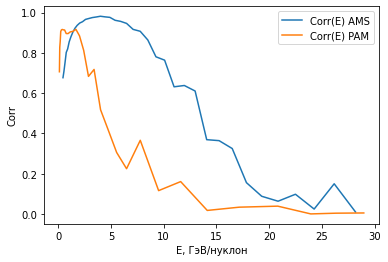

In [53]:
ener = data_he[2045][4]
data_he1 = load_obj('AMS_spec_he')
ener1 = data_he1[2426][4]

fig, ax = plt.subplots()
ax.plot(ener1[:40], corr1[:40])
ax.plot(ener[:30], corr[:30])

ax.legend(["Corr(E) AMS", "Corr(E) PAM"])
ax.set_xlabel("E, ГэВ/нуклон")
ax.set_ylabel("Corr")